In [1]:
import h5py
import sys
sys.path.append('..')
from modules.configfile import config
import matplotlib.pyplot as plt

In [2]:
hdf5_file = h5py.File(config['hdf5_combined'], mode='r')

In [3]:
hdf5_file_g = hdf5_file['combined']

In [4]:
import cPickle as pickle

mean_var = pickle.load(open(config['saveMeanVarCombinedData'], 'rb'))

In [5]:
def apply_mean_std(im, mean_var):
    # expects a dictionary of means and VARIANCES, NOT STD
    return (im - mean_var['mn'][m]) / np.sqrt(mean_var['var'][m]) 

In [7]:
mean_var['var']

[299264.5, 362103.22, 317921.5, 319424.38]

In [6]:
mean_var['mn']

[101.05125, 104.49648, 111.35362, 70.276123]

In [8]:
import numpy as np

visualizing the slices..


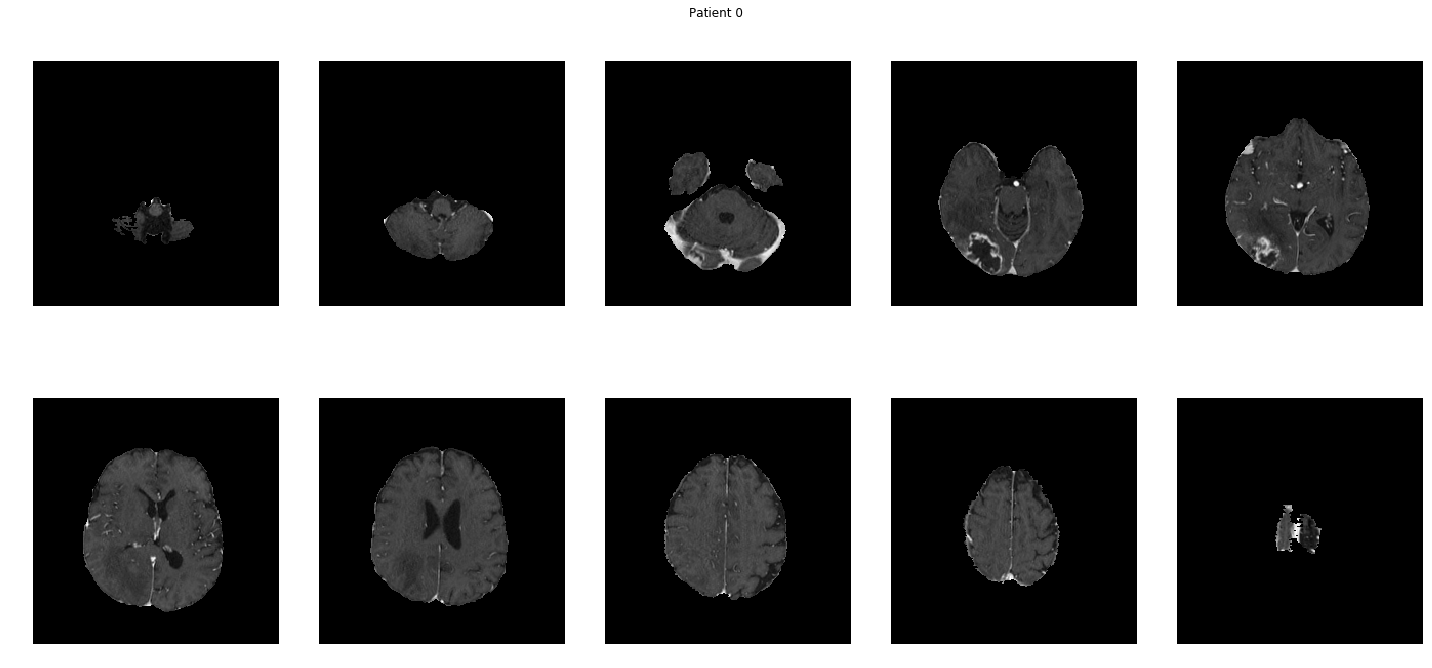

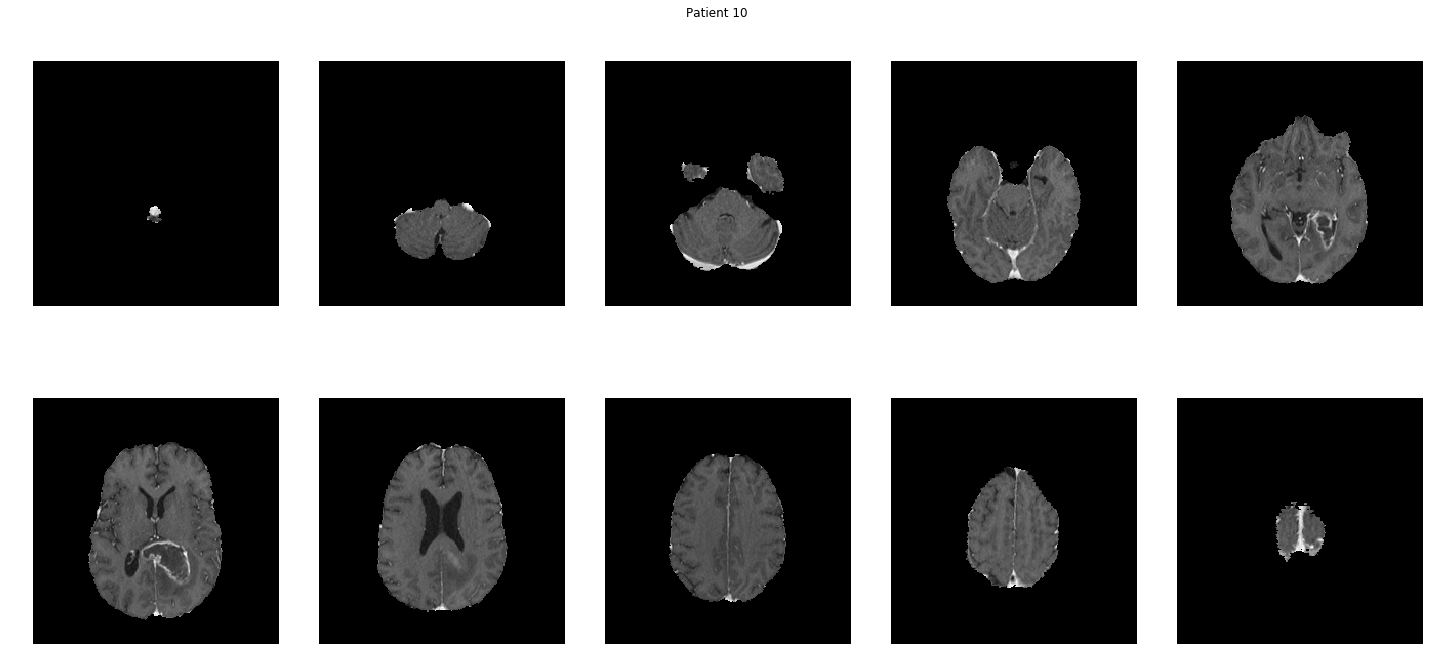

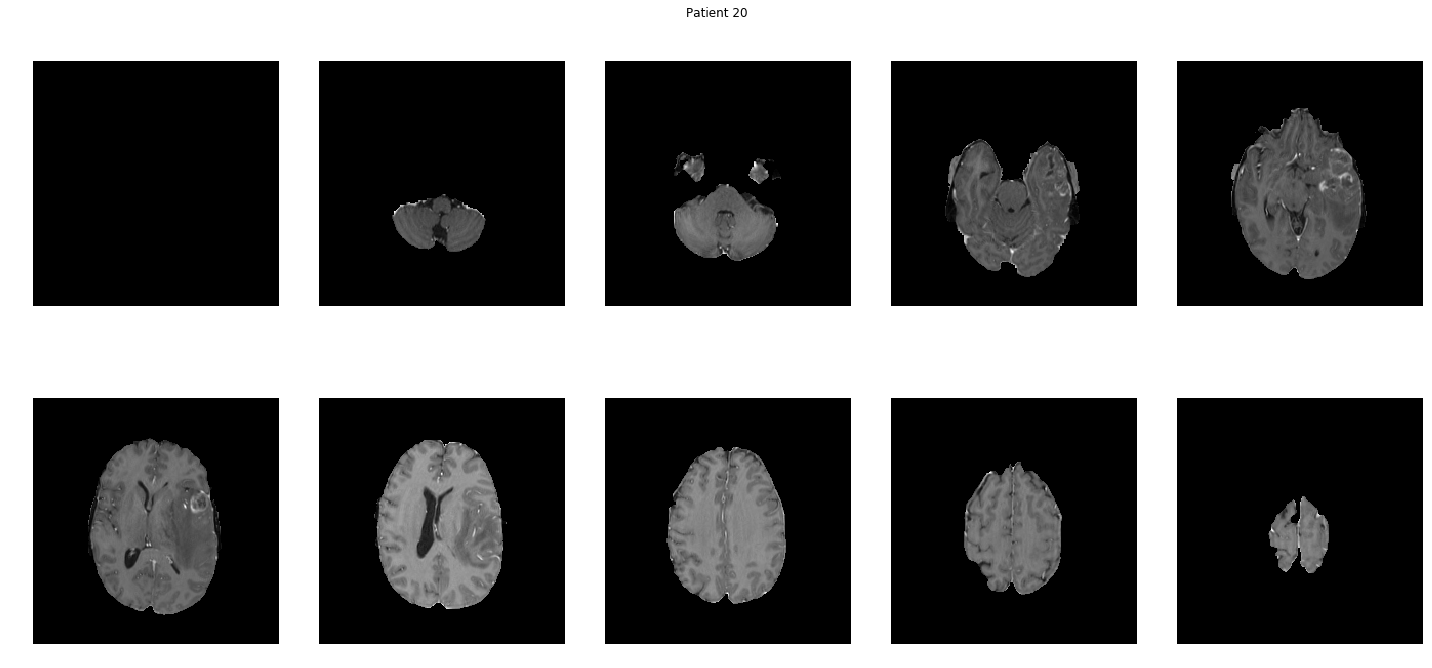

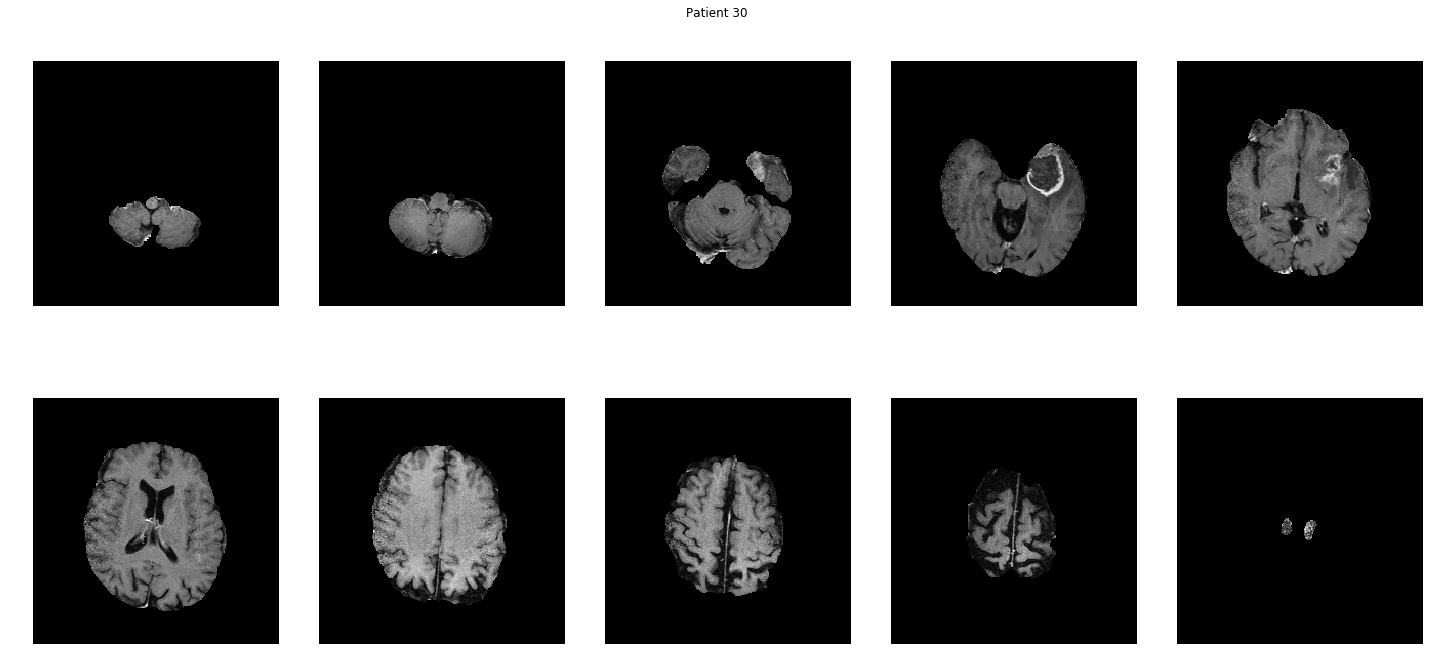

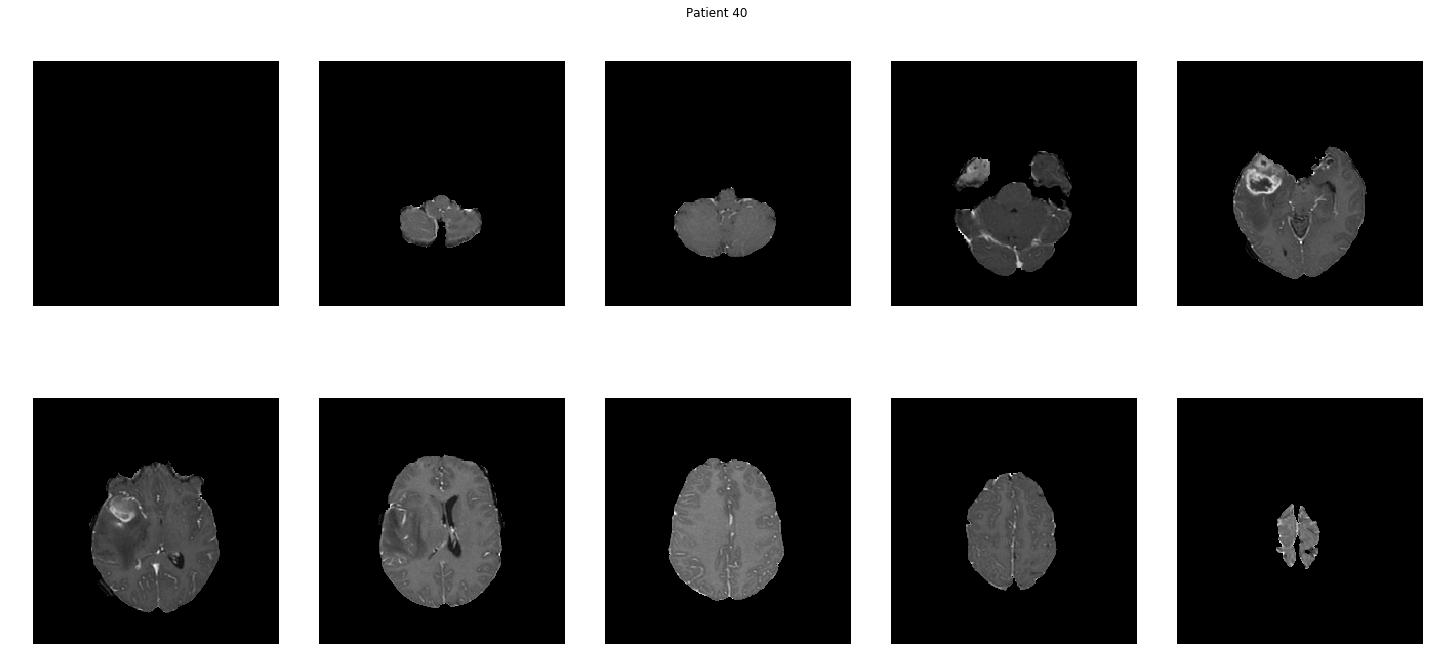

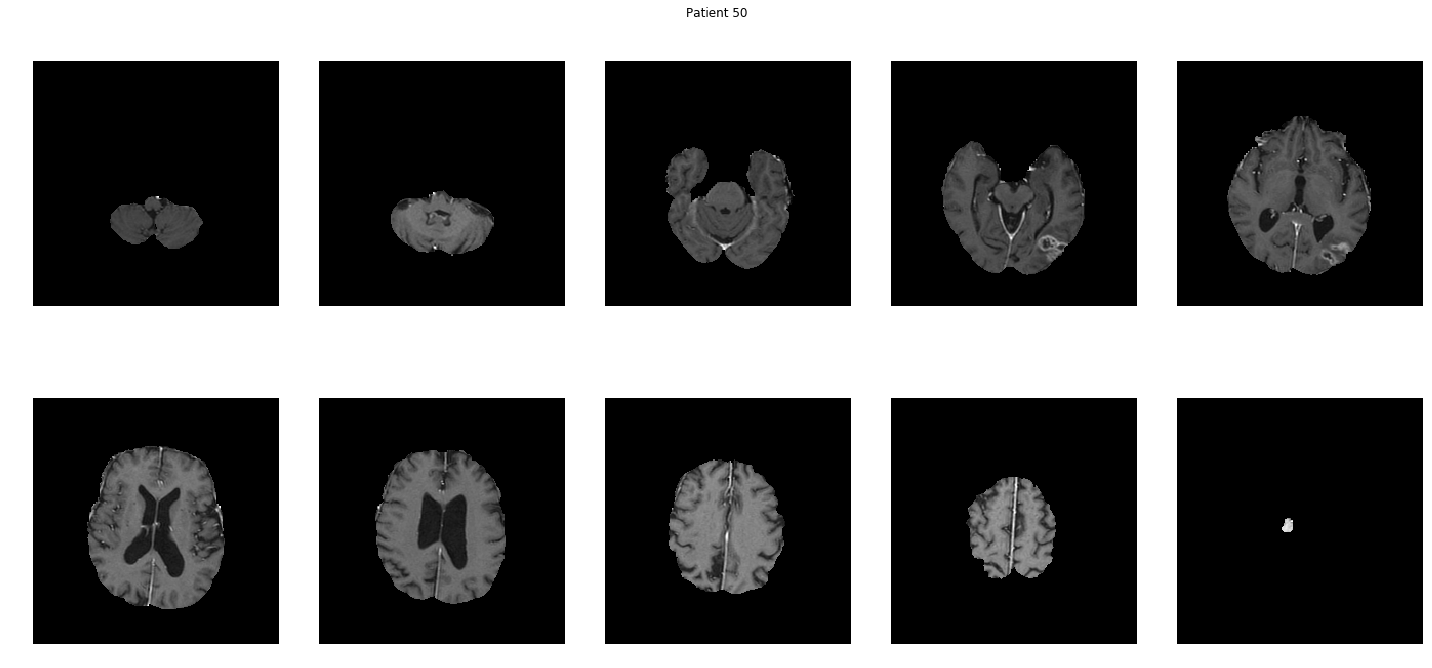

KeyboardInterrupt: 

In [9]:
print('visualizing the slices..')
data_to_viz = 'training_data'
m = 2
for pat in range(0, hdf5_file_g[data_to_viz].shape[0], 10):
    fig, ax = plt.subplots(nrows=2, ncols=5, squeeze=False, figsize=(20,10))
    ax = [i for ls in ax for i in ls]
    c = 0
    for a in ax:
        if c < 155:
            im = apply_mean_std(hdf5_file_g[data_to_viz][pat, m,:,:,c], mean_var)
            a.imshow(im, cmap='gray')
            a.axis('off')
            c += 15
        else:
            break
    plt.tight_layout()
    plt.suptitle('Patient {}'.format(pat))
    plt.show()

# Visualize individual patient

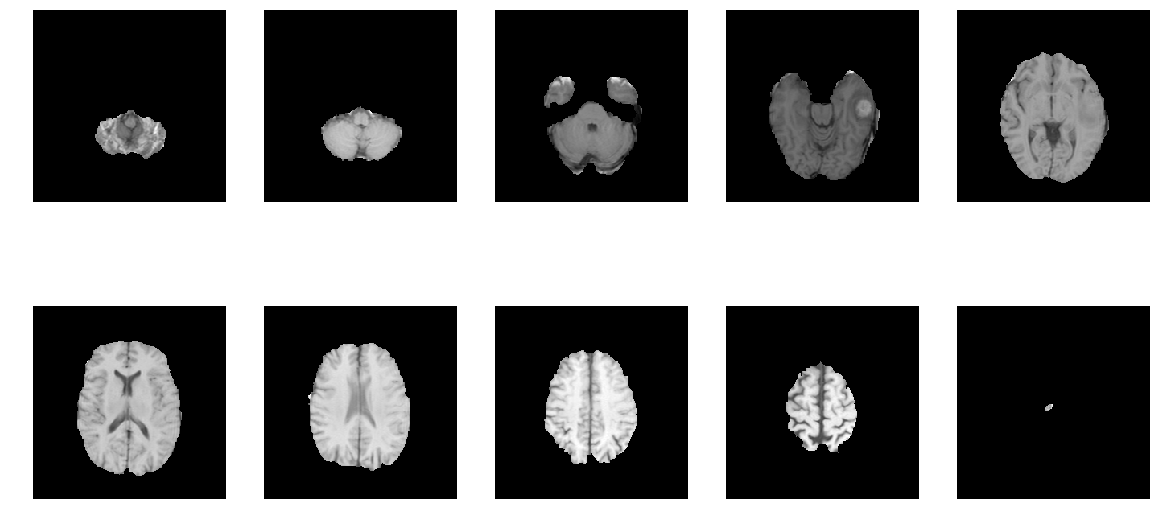

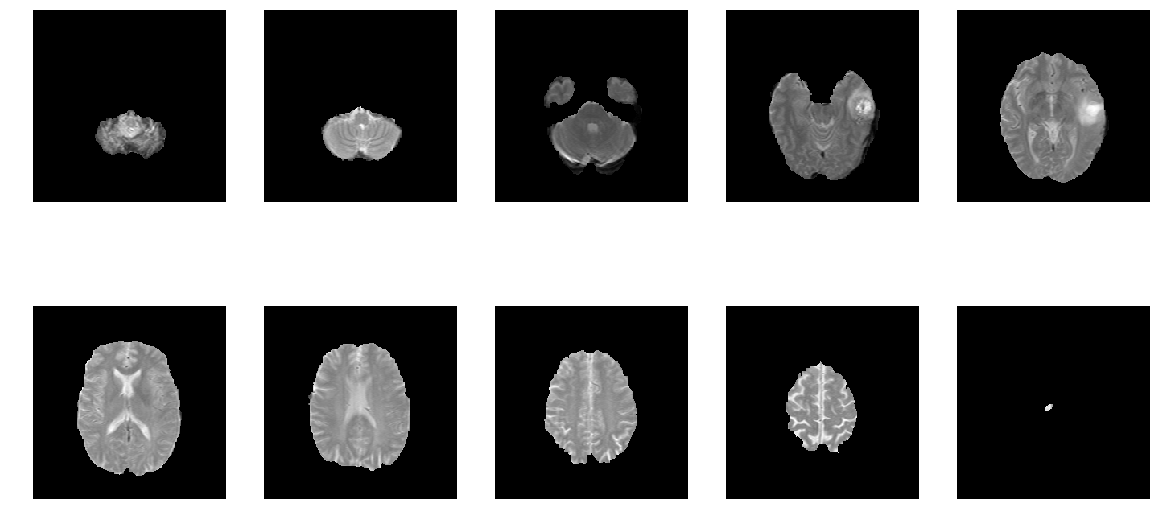

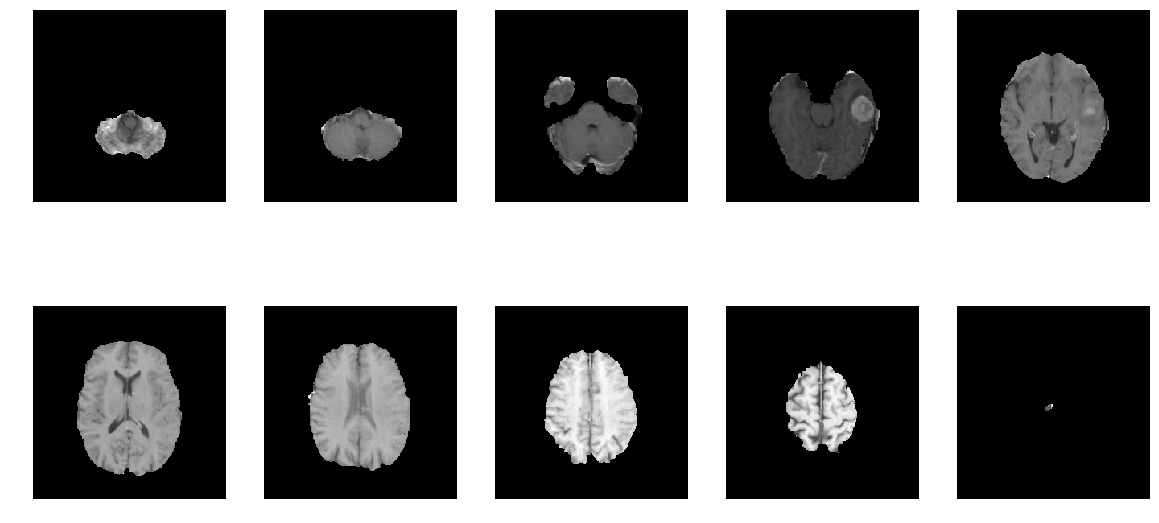

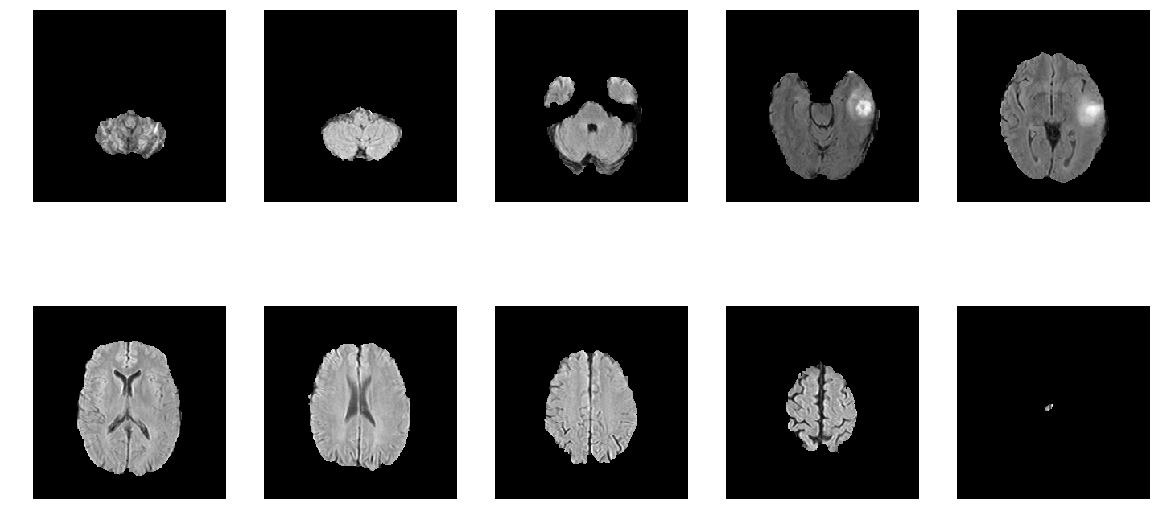

In [7]:
for mod in range(0,4):
    fig, ax = plt.subplots(nrows=2, ncols=5, squeeze=False, figsize=(20,10))
    ax = [i for ls in ax for i in ls]
    c = 0
    for a in ax:
        if c < 155:
            a.imshow(hdf5_file[data_to_viz][0, mod,:,:,c], cmap='gray')
            a.axis('off')
            c += 15
        else:
            break
            
plt.show()